# Bank Marketing Classification

## Machine Learning - Supervised Learning

Created by : Raditya Saputra

# Informasi Dataset

- Dataset ini terkait operasi pemasaran yang terhubung langsung dengan lembaga perbankan Portugis.
- Operasi pemasaran didasarkan pada panggilan telpon.
- Diperlukan lebih dari satu kontak klien yang sama.
- Untuk mengetahui apakah akan berlangganan (deposito jangka panjang) ya/tidak.
- Bank-additional-full.csv mempunyai baris 41188 and 20 kolum/input yang diurutkan berdasarkan tanggal (dari May 2008 sampai November 2010)
- Tujuan dataset ini digunakan adalah untuk menentukan apakah klien akan berlangganan ya/tidak pada deposito berjangka.
-       * NB : Deposito adalah uang yang disimpan dalam rekening. Deposito biasanya memiliki jangka waktu tertentu yang mana uang di dalamnya tidak boleh ditarik nasabah. Deposito baru bisa dicairkan sesuai dengan tanggal jatuh temponya, biasanya deposito mempunyai jatuh tempo 1, 3, 6, atau 12 bulan.

# Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

import time
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv', encoding='latin1', na_values='n/a', sep=None, thousands=',')
pd.set_option('display.max_columns', None)

# Gambaran sekilas Dataset

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Informasi Atribut

# A. Input variables:
# Data Klien Bank:
1. age/umur (numeric)
2. job/pekerjaan : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital/status perkawinan : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education/pendidikan (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default?/mempunyai kredit (categorical: 'no','yes','unknown')
6. housing: has housing loan?/memiliki pinjaman perumahan (categorical: 'no','yes','unknown')
7. loan: has personal loan?/memiliki utang (categorical: 'no','yes','unknown')

# Hubungan Kontak terakhir saat ini :
8. contact/panggilan: contact communication type (categorical: 'cellular','telephone')
9. month/bulan: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week/kontak terakhir hari dalam seminggu: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration/durasi kontak terakhir: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# Attributes Lainnya:
12. campaign/jumlah kontak selama operasi: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays/jumlah hari yang lewat setelah klien terakhir dihubungi dari operasi sebelumnya: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted/tidak dihubungi sebelumnya)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome/hasil dari operasi sebelumnya: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Attribut Sosial dan Ekonomi :
16. emp.var.rate: tingkat variasi pekerjaan - indikator triwulanan (numerik)
17. cons.price.idx: indeks harga konsumen - indikator bulanan (numerik)
18. cons.conf.idx: indeks kepercayaan konsumen - indikator bulanan (numerik)
19. euribor3m: tarif euribor 3 bulan - indikator harian (numerik)
20. nr.employed: jumlah karyawan - indikator triwulanan (numerik)

# B. Output variable (Target yang diinginkan):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

# Exploratory Data Analysis

In [4]:
# Menampilkan 5 informasi terbawah
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# Menampilkan informasi jumlah baris dan kolum
df.shape

(41188, 21)

Ringkasan :
- Dataset terdiri dari 41188 baris dan 21 kolum

In [6]:
# Menampilkan informasi tipe data dan missing values dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Ringkasan :
- Dataset terdiri dari 2 tipe data : numerik dan object
- Tidak ada data yang hilang/missing values

In [7]:
# Menampilkan informasi seluruh kolum pada dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Ringkasan : 
- Terdiri dari 21 kolum

In [8]:
# Menampilkan informasi apakah ada data yang hilang
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Ringkasan :
- Tidak ada data yang hilang

In [9]:
# Menampilkan informasi statistika tipe data numerikal
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Ringkasan : 
- Age yang tertinggi ialah 98
- Duration tertinggi adalah 4918
- Campaign tertinggi adalah 56
- Pdays tertinggi adalah 999/tidak ada dihubungi kembali
- Previous tertinggi adalah 7
- emp.var rate tertinggi adalah 1.4
- cons.price idx tertinggi adalah 94.7
- euribor3m tertinggi adalah 5
- jumlah karyawan terbanyak adalah 5228

In [10]:
# Menampilkan informasi statistika tipe object pada dataset
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Ringkasan :
- job mempunyai label 12, yang paling banyak muncul adalah admin. dan berjumlah 10422
- Marital mempunyai label 4 dan yang paling banyak muncul adalah sudah menikah dengan jumlah 24928
- Education mempunyai label 8 yang paling banyak muncul adalah university degree dengan jumlah 12168
- Default mempunyai label 3 dan yang paling banyak muncul adalah no dengan jumlah 32588
- Housing mempunyai label 3 dengan yang paling banyak muncul adalah yes dengan jumlah 21576
- Loan mempunyai label 3 dengan yang paling banyak adalah no dengan jumlah 33950
- Contact mempunyai label 2 dengan yang paling banyak adalah celluler dengna jumlah 26144
- Month mempunya label 10 dengan yang paling banyak muncul adalah may dengan jumlah 13769
- Day of week mempunyai label 5 dengan yang paling banyak muncul adalah thursday dengan jumlah 8623
- Poutocme mempunyai label 3 dengan yang paling banyak muncul adalah nonexistent dengan jumlah 35563
- y mempunyai label 2 dengan yang paling banyak muncul adalah no dengan jumlah 36548

# Visualisasi 

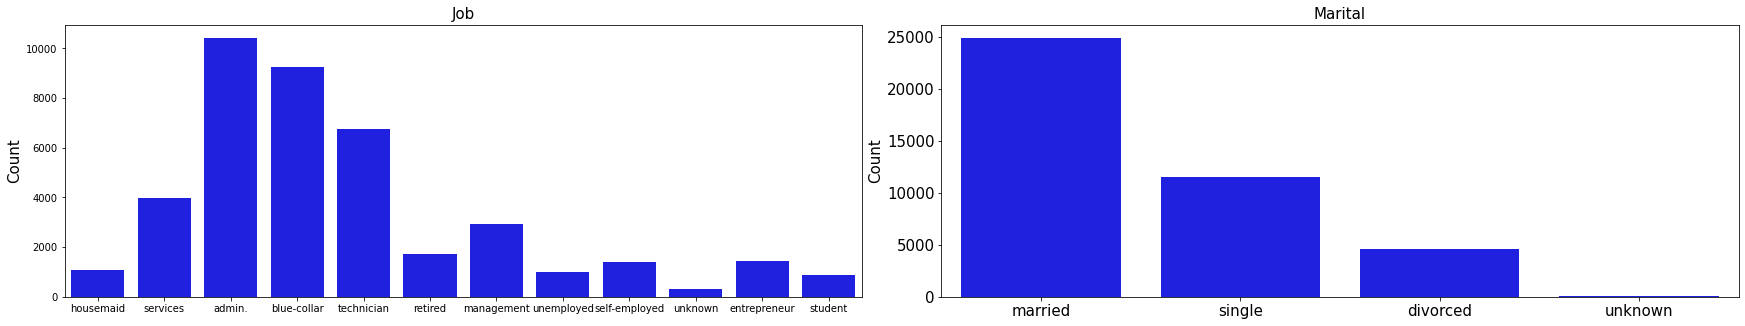

In [11]:
# Job
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (30,5))
sns.countplot(x = 'job', data = df, ax = ax1, order = ['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], color='b')
ax1.set_title('Job', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=10)

# Martial
sns.countplot(x = 'marital', data = df, ax = ax2, order = ['married', 'single', 'divorced', 'unknown'], color='b')
ax2.set_title('Marital', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.1)

Ringkasan :
- Jumlah job yang paling banyak yaitu admin. dan paling sedikit unknown
- Jumlah status perkawinan yang paling banyak yaitu sudah menikah dan tidak diketahui paling sedikit

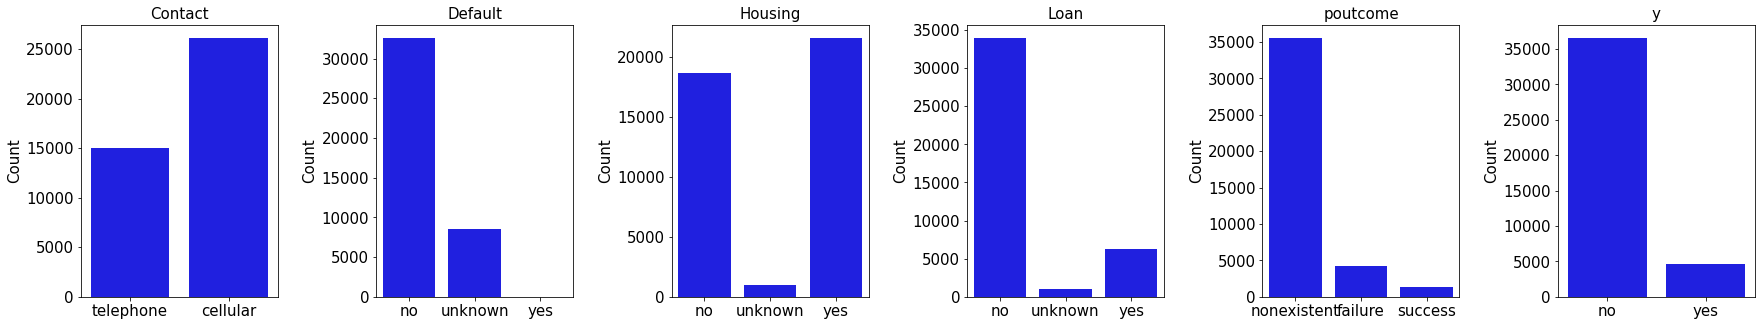

In [12]:
# Contact
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 1, ncols = 6, figsize = (30,5))
sns.countplot(x = 'contact', data = df, ax = ax1, order = ['telephone','cellular'], color='b')
ax1.set_title('Contact', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Default
sns.countplot(x = 'default', data = df, ax = ax2, order = ['no', 'unknown', 'yes'], color='b')
ax2.set_title('Default', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df, ax = ax3, order = ['no', 'unknown', 'yes'], color='b')
ax3.set_title('Housing', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df, ax = ax4, order = ['no', 'unknown', 'yes'], color='b')
ax4.set_title('Loan', fontsize=15)
ax4.set_xlabel('')
ax4.set_ylabel('Count', fontsize=15)
ax4.tick_params(labelsize=15)

# poutcome
sns.countplot(x = 'poutcome', data = df, ax = ax5, order = ['nonexistent', 'failure', 'success'], color='b')
ax5.set_title('poutcome', fontsize=15)
ax5.set_xlabel('')
ax5.set_ylabel('Count', fontsize=15)
ax5.tick_params(labelsize=15)

# y
sns.countplot(x = 'y', data = df, ax = ax6, order = ['no','yes'], color='b')
ax6.set_title('y', fontsize=15)
ax6.set_xlabel('')
ax6.set_ylabel('Count', fontsize=15)
ax6.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)

Ringkasan :
- Jumlah kontak yang paling banyak dilakukan melalui seluler
- Jumlah default atau yang menggunakan kartu kredit paling banyak itu no, atau tidak ada dan tidak ada satu pun yang menggunakan kartu kredit
- Jumlah orang yang sudah melakukan pinjaman rumah paling banyak
- Jumlah orang yang berhutang itu paling banyak tidak ada
- Jumlah yang berhasil setelah dilakukan nya operasi deposito jangka panjang tidak diketahui
- Jumlah orang yang ingin melakukan deposito jangka panjang yang paling banyak tidak

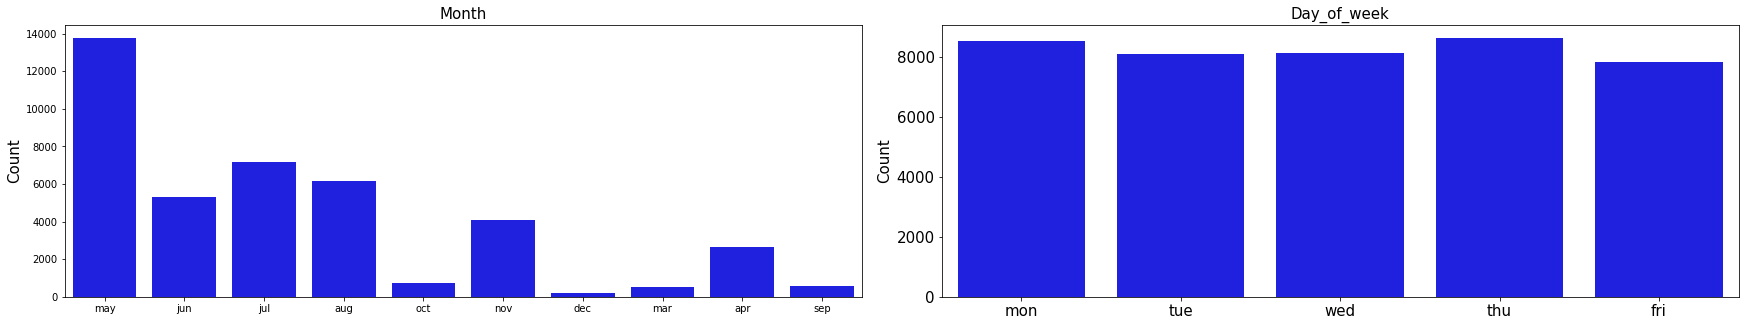

In [13]:
# Month
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (30,5))
sns.countplot(x = 'month', data = df, ax = ax1, order = ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], color='b')
ax1.set_title('Month', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=10)

# Day_of_week
sns.countplot(x = 'day_of_week', data = df, ax = ax2, order = ['mon', 'tue', 'wed', 'thu', 'fri'], color='b')
ax2.set_title('Day_of_week', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.1)

Ringkasan :
- Operasi dilakukan paling sering pada bulan may
- Operasi dilakukan setiap minggu dan yang paling banyak ialah hari kamis

Outliers

Text(0, 0.5, 'Campaign')

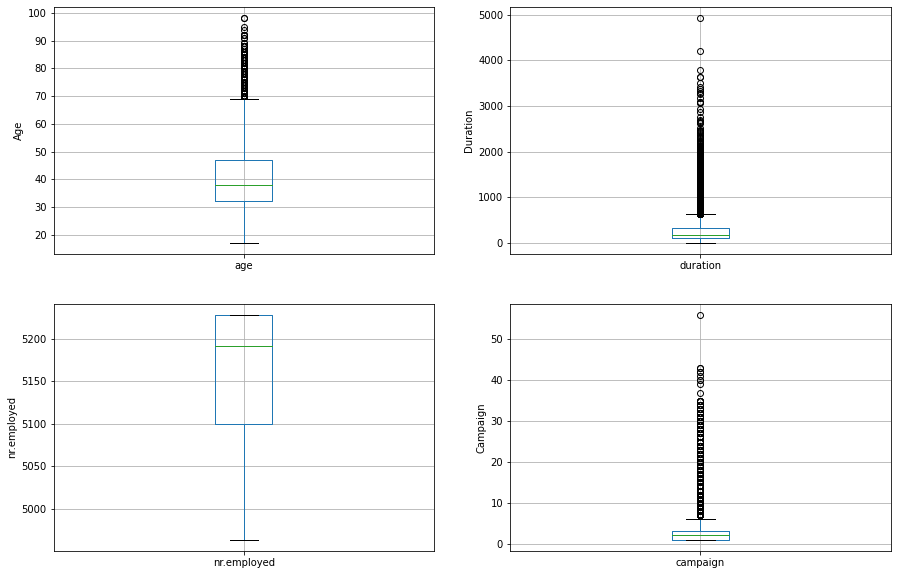

In [14]:
# Menampilkan boxplots visualisasi outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='duration')
fig.set_title('')
fig.set_ylabel('Duration')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='nr.employed')
fig.set_title('')
fig.set_ylabel('nr.employed')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='campaign')
fig.set_title('')
fig.set_ylabel('Campaign')

Ringkasan :
- Terdapat outlier pada age, duration, campaign

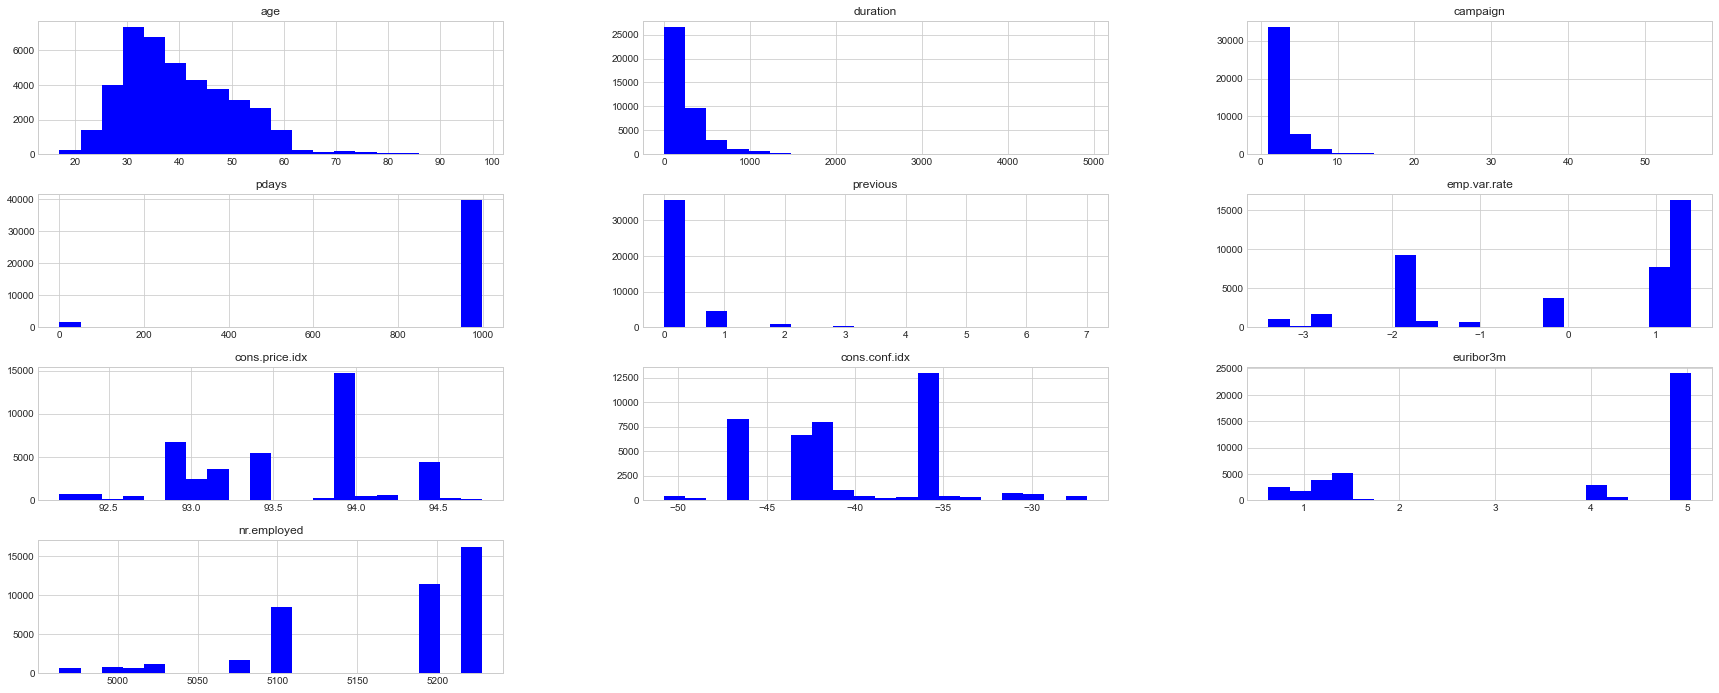

In [15]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(30,12), color='b')
plt.show()

Ringkasan :
- Persebaran data umur hampir mendekati normal distribusi dan yang lainnya skewed

# Splitting dataset

In [3]:
X = df.drop(['duration', 'y'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

Ringkasan :
- Splitting dilakukan dengan proporsi Train 70 dan test 30
- Setelah itu di split lagi dengan proporsi 90 dan val 10

In [17]:
# Jumlah data train
X_train.shape

(25947, 19)

In [18]:
# Jumlah data test
X_test.shape

(12357, 19)

In [19]:
# Jumlah data validasi
X_val.shape

(2884, 19)

# Preprocessing

In [4]:
# Membuat kolum class untuk numerikal dan categorical 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [5]:
# Menggunakan pipline untuk scaling dan encoding
num_attribs = ['age','campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
cat_attribs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [6]:
old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [7]:
X_train = old_full_pipeline.fit_transform(X_train)
X_test = old_full_pipeline.transform(X_test)
X_val = old_full_pipeline.transform(X_val)

In [8]:
# Encoding target
encod = LabelEncoder()
y_train = encod.fit_transform(y_train)
y_test = encod.transform(y_test)

# Modeling

In [9]:
# Modeling dilakukan dengan model sebagai berikut :
lr = LogisticRegression()
kn = KNeighborsClassifier(n_neighbors=3)
dc = DecisionTreeClassifier(max_depth=2)
rf = RandomForestClassifier(n_estimators=18)
nb = GaussianNB()
lsvm = SVC()

# Evaluasi Accuracy Score Overfit/Underfit/Goodfit

- Logistic Regression

In [26]:
# lr
# waktu yang dibutuhkan dan hasil training dan test
t_start = time.process_time()
%time lr.fit(X_train, y_train)
train_score_predic_lr = lr.predict(X_train)
test_score_predic_lr = lr.predict(X_test)
print('lr accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, train_score_predic_lr),
        accuracy_score(y_test, test_score_predic_lr)))

Wall time: 538 ms
lr accuracy score for train: 0.900: test: 0.899


Model tidak mengalami overfit dan underfit

- KNeighbors

In [27]:
# kn
# waktu yang dibutuhkan dan hasil training dan test
%time kn.fit(X_train, y_train)
train_score_predic_kn = kn.predict(X_train)
test_score_predic_kn = kn.predict(X_test)
print('kn accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, train_score_predic_kn),
        accuracy_score(y_test, test_score_predic_kn)))

Wall time: 6.99 ms
kn accuracy score for train: 0.923: test: 0.884


Model mengalami overfit dimana training jauh lebih besar dari testing

- Decision Tree

In [28]:
# dc
# waktu yang dibutuhkan dan hasil training dan test
%time dc.fit(X_train, y_train)
train_score_predic_dc = dc.predict(X_train)
test_score_predic_dc = dc.predict(X_test)
print('dc accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, train_score_predic_dc),
        accuracy_score(y_test, test_score_predic_dc)))

Wall time: 106 ms
dc accuracy score for train: 0.899: test: 0.899


Model tidak mengalami overfit dan underfit

- Random Forest

In [29]:
# rf
# waktu yang dibutuhkan dan hasil training dan test
%time rf.fit(X_train, y_train)
train_score_predic_rf = rf.predict(X_train)
test_score_predic_rf = rf.predict(X_test)
print('rf accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, train_score_predic_rf),
        accuracy_score(y_test, test_score_predic_rf)))

Wall time: 507 ms
rf accuracy score for train: 0.989: test: 0.892


Model mengalami overfit dimana train lebih besar dari test

- Naive Bayes Gaussian

In [30]:
# nb
# waktu yang dibutuhkan dan hasil training dan test
%time nb.fit(X_train, y_train)
train_score_predic_nb = nb.predict(X_train)
test_score_predic_nb = nb.predict(X_test)
print('nb accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, train_score_predic_nb),
        accuracy_score(y_test, test_score_predic_nb)))

Wall time: 50 ms
nb accuracy score for train: 0.801: test: 0.803


Model tidak mengalami overfit

- SVM

In [31]:
# lsvm
# waktu yang dibutuhkan dan hasil training dan test
%time lsvm.fit(X_train, y_train)
train_score_predic_lsvm = lsvm.predict(X_train)
test_score_predic_lsvm = lsvm.predict(X_test)
print('lsvm accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, train_score_predic_lsvm),
        accuracy_score(y_test, test_score_predic_lsvm)))

Wall time: 1min 1s
lsvm accuracy score for train: 0.904: test: 0.899


Model tidak mengalami overfit

# Other Algorithm

- Gradient Boosting

In [32]:
# Gradient bossting
# waktu yang dibutuhkan dan hasil training dan test
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
# gb
%time gb.fit(X_train, y_train)
train_score_predic_gb = gb.predict(X_train)
test_score_predic_gb = gb.predict(X_test)
print('gb accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, train_score_predic_gb),
        accuracy_score(y_test, test_score_predic_gb)))

Wall time: 4.53 s
gb accuracy score for train: 0.905: test: 0.900


Model tidak mengalami overfit

# Cross Validation

In [33]:
# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=10)
log_reg_mean = log_scores.mean()
log_reg_std = log_scores.std()

# KNearestNeighbors
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=10)
knn_mean = knn_scores.mean()
knn_std = knn_scores.std()


# Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=10)
tree_mean = tree_scores.mean()
tree_std = tree_scores.std()


# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=10)
rand_mean = rand_scores.mean()
rand_std = rand_scores.std()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=10)
nav_mean = nav_scores.mean()
nav_std = nav_scores.std()

# SVM
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=10)
svc_mean = svc_scores.mean()
svc_std = svc_scores.std()

# gb
gb_clf = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_clf, X_train, y_train, cv=10)
gb_mean = gb_scores.mean()
gb_std = gb_scores.std()



# Membuat dataframe untuk hasil cross validation
d = {'Classifiers': ['Logistic Reg.', 'KNN', 'Dec Tree', 'Rand FC', 'Naives Bayes', 'SVM', 'Gboost'], 
    'Crossval Mean Scores': [log_reg_mean, knn_mean, tree_mean, rand_mean, nav_mean, svc_mean, gb_mean],
    'Crossval Std Scores': [log_reg_std, knn_std, tree_std, rand_std, nav_std, svc_std, gb_std]}

result_df = pd.DataFrame(data=d)
# estimasi waktu yg dibutuhkan 10m

In [34]:
result_df = result_df.sort_values(by=['Crossval Mean Scores', 'Crossval Std Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores,Crossval Std Scores
6,Gboost,0.900143,0.004194
0,Logistic Reg.,0.900027,0.002974
2,Dec Tree,0.899102,0.002820
5,SVM,0.898986,0.003140
3,Rand FC,0.890007,0.004930
1,KNN,0.882530,0.004403
4,Naives Bayes,0.805759,0.016112


Model evaluasi crossval yang terbaik ialah Gboost namun jika kita mengacu pada std model yang terbaik ialah decision tree

# Evaluasi Confussion Matrix

Confusion matrix adalah alat untuk meringkas kinerja algoritma klasifikasi. Confusion matrix akan memberikan gambaran yang jelas tentang kinerja model klasifikasi dan jenis kesalahan yang dihasilkan oleh model tersebut. Ini memberi kita ringkasan prediksi yang benar dan salah yang dirinci oleh setiap kategori. Ringkasan disajikan dalam bentuk tabel.

Empat jenis hasil yang mungkin saat mengevaluasi kinerja model klasifikasi. Keempat hasil ini dijelaskan di bawah ini: -

True Positives (TP) – True Positives terjadi ketika kita memprediksi sebuah observasi milik kelas tertentu dan observasi sebenarnya milik kelas itu.

True Negatives (TN) – True Negatives terjadi ketika kita memprediksi sebuah observasi bukan milik kelas tertentu dan observasi sebenarnya bukan milik kelas itu.

False Positive (FP) – Positif Palsu terjadi ketika kita memprediksi suatu pengamatan termasuk dalam kelas tertentu tetapi pengamatan itu sebenarnya bukan milik kelas itu. Jenis kesalahan ini disebut kesalahan Tipe I.

False Negatives (FN) – False Negatives terjadi ketika kita memprediksi sebuah observasi bukan milik kelas tertentu tetapi observasi sebenarnya milik kelas itu. Ini adalah kesalahan yang sangat serius dan disebut kesalahan Tipe II.

- Logistic Regression

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpredict = logmodel.predict(X_test)
cm_logmodel = confusion_matrix(y_test, logpredict)

print('Confusion matrix\n\n', cm_logmodel)
print('\nTrue Positives(TP) = ', cm_logmodel[0,0])
print('\nTrue Negatives(TN) = ', cm_logmodel[1,1])
print('\nFalse Positives(FP) = ', cm_logmodel[0,1])
print('\nFalse Negatives(FN) = ', cm_logmodel[1,0])

Confusion matrix

 [[10800   169]
 [ 1079   309]]

True Positives(TP) =  10800

True Negatives(TN) =  309

False Positives(FP) =  169

False Negatives(FN) =  1079


- Confusion Matrix menunjukkan 10800 + 309 = 11109 prediksi yang benar dan 169 + 1079 = 1248 prediksi yang salah.

- Dalam hal ini, kami memiliki

- TP (Positif Aktual: 1 dan Prediksi Positif: 1) - 10800
- TN (Negatif Aktual:0 dan Prediksi Negatif:0) - 309
- FP (Negatif Aktual:0 tetapi Prediksi Positif:1) - 169 (Kesalahan Tipe I)
- FN (Positif Aktual: 1 tetapi Prediksi Negatif: 0) - 1079 (Kesalahan Tipe II)

- KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, knnpred)

print('Confusion matrix\n\n', cm_knn)
print('\nTrue Positives(TP) = ', cm_knn[0,0])
print('\nTrue Negatives(TN) = ', cm_knn[1,1])
print('\nFalse Positives(FP) = ', cm_knn[0,1])
print('\nFalse Negatives(FN) = ', cm_knn[1,0])

Confusion matrix

 [[10498   471]
 [  960   428]]

True Positives(TP) =  10498

True Negatives(TN) =  428

False Positives(FP) =  471

False Negatives(FN) =  960


- Confusion Matrix menunjukkan 10791 + 311 = 11102 prediksi yang benar dan 178 + 1077 = 1255 prediksi yang salah.

- Dalam hal ini, kami memiliki

- TP (Positif Aktual: 1 dan Prediksi Positif: 1) - 10791
- TN (Negatif Aktual:0 dan Prediksi Negatif:0) - 311
- FP (Negatif Aktual:0 tetapi Prediksi Positif:1) - 178 (Kesalahan Tipe I)
- FN (Positif Aktual: 1 tetapi Prediksi Negatif: 0) - 1077 (Kesalahan Tipe II)

- Decision Tree

In [37]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
cm_dt = confusion_matrix(y_test, dtreepred)

print('Confusion matrix\n\n', cm_dt)
print('\nTrue Positives(TP) = ', cm_dt[0,0])
print('\nTrue Negatives(TN) = ', cm_dt[1,1])
print('\nFalse Positives(FP) = ', cm_dt[0,1])
print('\nFalse Negatives(FN) = ', cm_dt[1,0])

Confusion matrix

 [[10848   121]
 [ 1131   257]]

True Positives(TP) =  10848

True Negatives(TN) =  257

False Positives(FP) =  121

False Negatives(FN) =  1131


- Confusion Matrix menunjukkan 10848 + 257 = 11105 prediksi yang benar dan 121 + 1131 = 1252 prediksi yang salah.

- Dalam hal ini, kami memiliki

- TP (Positif Aktual: 1 dan Prediksi Positif: 1) - 10848
- TN (Negatif Aktual:0 dan Prediksi Negatif:0) - 257
- FP (Negatif Aktual:0 tetapi Prediksi Positif:1) - 121 (Kesalahan Tipe I)
- FN (Positif Aktual: 1 tetapi Prediksi Negatif: 0) - 1131 (Kesalahan Tipe II)

- Random Forest

In [38]:
rfc = RandomForestClassifier(n_estimators = 18)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
cm_rf = confusion_matrix(y_test, rfcpred)

print('Confusion matrix\n\n', cm_rf)
print('\nTrue Positives(TP) = ', cm_rf[0,0])
print('\nTrue Negatives(TN) = ', cm_rf[1,1])
print('\nFalse Positives(FP) = ', cm_rf[0,1])
print('\nFalse Negatives(FN) = ', cm_rf[1,0])

Confusion matrix

 [[10643   326]
 [ 1024   364]]

True Positives(TP) =  10643

True Negatives(TN) =  364

False Positives(FP) =  326

False Negatives(FN) =  1024


- Confusion Matrix menunjukkan 10660 + 374 = 11034 prediksi yang benar dan 309 + 1014 = 1323 prediksi yang salah.

- Dalam hal ini, kami memiliki

- TP (Positif Aktual: 1 dan Prediksi Positif: 1) - 10660
- TN (Negatif Aktual:0 dan Prediksi Negatif:0) - 374
- FP (Negatif Aktual:0 tetapi Prediksi Positif:1) - 309 (Kesalahan Tipe I)
- FN (Positif Aktual: 1 tetapi Prediksi Negatif: 0) - 1014 (Kesalahan Tipe II)

- Naive Bayes Gaussian

In [39]:
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)
cm_nb = confusion_matrix(y_test, gaussiannbpred)

print('Confusion matrix\n\n', cm_nb)
print('\nTrue Positives(TP) = ', cm_nb[0,0])
print('\nTrue Negatives(TN) = ', cm_nb[1,1])
print('\nFalse Positives(FP) = ', cm_nb[0,1])
print('\nFalse Negatives(FN) = ', cm_nb[1,0])

Confusion matrix

 [[9084 1885]
 [ 553  835]]

True Positives(TP) =  9084

True Negatives(TN) =  835

False Positives(FP) =  1885

False Negatives(FN) =  553


- Confusion Matrix menunjukkan 9084 + 835 = 9919 prediksi yang benar dan 1885 + 553 = 2438 prediksi yang salah.

- Dalam hal ini, kami memiliki

- TP (Positif Aktual: 1 dan Prediksi Positif: 1) - 9084
- TN (Negatif Aktual:0 dan Prediksi Negatif:0) - 835
- FP (Negatif Sebenarnya: 0 tetapi Prediksi Positif: 1) - 1885 (Kesalahan Tipe I)
- FN (Positif Aktual: 1 tetapi Prediksi Negatif: 0) - 553 (Kesalahan Tipe II)

- SVM

In [40]:
svc= SVC()
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
cm_svm = confusion_matrix(y_test, svcpred)

print('Confusion matrix\n\n', cm_svm)
print('\nTrue Positives(TP) = ', cm_svm[0,0])
print('\nTrue Negatives(TN) = ', cm_svm[1,1])
print('\nFalse Positives(FP) = ', cm_svm[0,1])
print('\nFalse Negatives(FN) = ', cm_svm[1,0])

Confusion matrix

 [[10802   167]
 [ 1076   312]]

True Positives(TP) =  10802

True Negatives(TN) =  312

False Positives(FP) =  167

False Negatives(FN) =  1076


- Confusion Matrix menunjukkan 10802 + 312 = 11114 prediksi yang benar dan 167 + 1076 = 1243 prediksi yang salah.

- Dalam hal ini, kami memiliki

- TP (Positif Aktual: 1 dan Prediksi Positif: 1) - 10802
- TN (Negatif Aktual:0 dan Prediksi Negatif:0) - 312
- FP (Negatif Sebenarnya: 0 tetapi Prediksi Positif: 1) - 167 (Kesalahan Tipe I)
- FN (Positif Aktual: 1 tetapi Prediksi Negatif: 0) - 1076 (Kesalahan Tipe II)

- Gradient Boosting

In [41]:
gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)
gbpred = gboost.predict(X_test)
cm_gb = confusion_matrix(y_test, gbpred)

print('Confusion matrix\n\n', cm_gb)
print('\nTrue Positives(TP) = ', cm_gb[0,0])
print('\nTrue Negatives(TN) = ', cm_gb[1,1])
print('\nFalse Positives(FP) = ', cm_gb[0,1])
print('\nFalse Negatives(FN) = ', cm_gb[1,0])

Confusion matrix

 [[10788   181]
 [ 1061   327]]

True Positives(TP) =  10788

True Negatives(TN) =  327

False Positives(FP) =  181

False Negatives(FN) =  1061


- Confusion Matrix menunjukkan 10793 + 323 = 11116 prediksi yang benar dan 176 + 1065 = 1241 prediksi yang salah.

- Dalam hal ini, kami memiliki

- TP (Positif Aktual: 1 dan Prediksi Positif: 1) - 10793
- TN (Negatif Aktual:0 dan Prediksi Negatif:0) - 323
- FP (Negatif Aktual:0 tetapi Prediksi Positif:1) - 176 (Kesalahan Tipe I)
- FN (Positif Aktual: 1 tetapi Prediksi Negatif: 0) - 1065 (Kesalahan Tipe II)

# Evaluasi Classification Report

Classification report adalah cara lain untuk mengevaluasi kinerja model klasifikasi. Ini menampilkan presisi, recall, f1 dan support untuk model.

Presisi dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang diprediksi. Ini dapat diberikan sebagai rasio positif sejati (TP) dengan jumlah positif benar dan salah (TP + FP).

Jadi, Precision mengidentifikasi proporsi hasil positif yang diprediksi dengan benar. Ia lebih mementingkan kelas positif daripada kelas negatif.

Secara matematis, presisi dapat didefinisikan sebagai rasio TP terhadap (TP + FP).

Recall dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang sebenarnya. Ini dapat diberikan sebagai rasio positif sejati (TP) dengan jumlah positif benar dan negatif palsu (TP + FN). Ingat juga disebut Sensitivitas.

Recall mengidentifikasi proporsi positif aktual yang diprediksi dengan benar.

Secara matematis, recall dapat diberikan sebagai rasio TP terhadap (TP + FN).

F1-score adalah rata-rata harmonik tertimbang dari presisi dan recall. Skor f1 terbaik yang mungkin adalah 1,0 dan yang terburuk adalah 0,0. F1-score adalah rata-rata harmonik presisi dan recall. Jadi, f1-score selalu lebih rendah dari ukuran akurasi karena mereka menanamkan presisi dan recall ke dalam perhitungannya. Rata-rata tertimbang skor F1 harus digunakan untuk membandingkan model pengklasifikasi, bukan akurasi global.

Support adalah jumlah aktual kemunculan kelas dalam kumpulan data kami.

- Linier Regression

In [42]:
print(classification_report(y_test, logpredict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.65      0.22      0.33      1388

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



- KNeighbors

In [43]:
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10969
           1       0.48      0.31      0.37      1388

    accuracy                           0.88     12357
   macro avg       0.70      0.63      0.66     12357
weighted avg       0.87      0.88      0.87     12357



- Decision Tree

In [44]:
print(classification_report(y_test, dtreepred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10969
           1       0.68      0.19      0.29      1388

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



- Random Forest

In [45]:
print(classification_report(y_test, rfcpred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10969
           1       0.53      0.26      0.35      1388

    accuracy                           0.89     12357
   macro avg       0.72      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357



- Naive Bayes Gaussian

In [46]:
print(classification_report(y_test, gaussiannbpred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88     10969
           1       0.31      0.60      0.41      1388

    accuracy                           0.80     12357
   macro avg       0.62      0.71      0.64     12357
weighted avg       0.87      0.80      0.83     12357



- SVM

In [47]:
print(classification_report(y_test, svcpred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.65      0.22      0.33      1388

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



- Gradient Boosting

In [48]:
print(classification_report(y_test, gbpred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.64      0.24      0.34      1388

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



# Grid Search Random Forest

- Set parameters untuk Grid Search Random Forest :

In [49]:
grid_params_rf = [{
                'criterion': ['entropy', 'gini'],
                'max_depth': [3, 6, 9, 12],
                'min_samples_split': [3, 6, 9 , 12],
                }]

In [50]:
# GridSearch best params dan score
rf = RandomForestClassifier(n_estimators=18)
rf_grid = GridSearchCV(rf, grid_params_rf, scoring='accuracy', cv = 10, return_train_score=True)
%time rf_grid.fit(X_train, y_train)

Wall time: 1min 9s


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=18),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 6, 9, 12],
                          'min_samples_split': [3, 6, 9, 12]}],
             return_train_score=True, scoring='accuracy')

In [51]:
print (rf_grid.best_params_)
print (rf_grid.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 12}
0.8992948897931047


# Retrain dan Evaluasi Random Forest

In [52]:
rf_best = rf_grid.best_estimator_
print(rf_best)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=12,
                       n_estimators=18)


In [53]:
rf_train_p = rf_best.predict(X_train)
rf_test_p = rf_best.predict(X_test)
print(rf_train_p)
print(rf_test_p)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [54]:
print('rf_hyp accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, rf_train_p),
        accuracy_score(y_test, rf_test_p)))

rf_hyp accuracy score for train: 0.907: test: 0.899


- rf accuracy score for train: 0.990: test: 0.893
- setelah di tunning rf_hyp accuracy score for train: 0.915: test: 0.900 menghasilkan model yang goodfit

In [55]:
rand_clf1 = RandomForestClassifier(criterion = 'gini', max_depth = 12, min_samples_leaf = 25, min_samples_split = 3, n_estimators = 18)
rand_scores1 = cross_val_score(rand_clf1, X_train, y_train, cv=10)
rand_mean1 = rand_scores1.mean()
rand_std1 = rand_scores1.std()
print (rand_mean1)
print (rand_std1)

0.8991407026441631
0.0025566497551302563


# Grid Search Decision Tree

- Set parameters untuk Grid Search Decision Tree:

In [10]:
params = {
    'min_samples_split' : np.arange(2,9),
    'max_depth' : np.arange(2,7),
    'criterion' : ['gini', 'entropy']
}

In [11]:
dt = DecisionTreeClassifier(random_state=0)
dt_grid = GridSearchCV(dt, params, scoring ="accuracy", cv = 10, return_train_score=True)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             return_train_score=True, scoring='accuracy')

In [12]:
print (f'best score :{dt_grid.best_score_}')
print (f'best params :{dt_grid.best_params_}')

best score :0.8994875383090962
best params :{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [13]:
dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# Retrain dan Evaluasi Decision Tree

In [14]:
dt_train_p = dt_best.predict(X_train)
dt_test_p = dt_best.predict(X_test)
print(dt_train_p)
print(dt_test_p)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [15]:
print('dt_hyp accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, dt_train_p),
        accuracy_score(y_test, dt_test_p)))

dt_hyp accuracy score for train: 0.902: test: 0.901


- dc accuracy score for train: 0.899: test: 0.899 sebelum di hyperparameter tunning dan
- setelah di tunning menjadi dt_hyp accuracy score for train: 0.902: test: 0.901

# Model Inferance

In [16]:
val = dt_grid.predict(X_val)
valt = dt_grid.predict(X_test)
print (val)
print (valt)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# Overall Analysis
- job yang paling banyak yaitu admin. dan paling sedikit unknown
- status perkawinan yang paling banyak yaitu sudah menikah dan tidak diketahui paling sedikit
- kontak yang paling banyak dilakukan melalui seluler
- default atau yang menggunakan kartu kredit paling banyak itu no, atau tidak ada dan tidak ada satu pun yang menggunakan kartu kredit
- orang yang sudah melakukan pinjaman rumah paling banyak
- orang yang berhutang itu paling banyak tidak ada
- yang berhasil setelah dilakukan nya operasi deposito jangka panjang tidak ada
- orang yang ingin melakukan deposito jangka panjang yang paling banyak tidak
- Operasi dilakukan paling sering pada bulan may
- Operasi dilakukan setiap minggu dan yang paling banyak ialah hari kamis 

dapat dilakukan strategi untuk menaikkan orang akan deposit jangka panjang ialah meningkatkan operasi tidak hanya pada bulan may saja, namun pada bulan berikutnya dan mencoba beberapa perlakuan khusus terhadap perkerja selain admin, memberikan beberapa edukasi/informasi keuntungan dan kenapa harus melakukan deposito jangka panjang, karena kebanyakkan deposito jangka panjang adalah admin, saya berasumsi admin lebih mengetahui nya.

- Splitting dilakukan dengan proporsi Train 70 dan test 30
- Setelah itu di split lagi dengan proporsi 90 dan val 10
- Scalling dan Encoding dilakukan dalam pipeline

Modeling yang digunakan :
- lr = LogisticRegression
- kn = KNeighborsClassifier
- dc = DecisionTreeClassifier
- rf = RandomForestClassifier
- nb = GaussianNB
- lsvm = SVC
- gb = GradientBoosting

- Model yang paling bagus menurut accuracy score ialah gb accuracy score for train: 0.905: test: 0.900
- Model yang paling bagus menurut cross validasi ialah Dec Tree	0.899102	0.002820
- Model yang paling bagus menurut confusion matrix ialah Gradient Boosting menunjukkan 10793 + 323 = 11116 prediksi yang benar dan 176 + 1065 = 1241 prediksi yang salah.
- Model menurut evaluasi f1 score naive bayes, knn, random forest dibawah 90
- Model yang paling lama training ialah svm dengan Wall time: 1min 18s
- Random Forest accuracy score for train: 0.990: test: 0.893
- setelah di tunning rf_hyp accuracy score for train: 0.915: test: 0.900 menghasilkan model yang goodfit
- decision tree accuracy score for train: 0.899: test: 0.899 sebelum di hyperparameter tunning dan
- setelah di tunning menjadi dt_hyp accuracy score for train: 0.902: test: 0.901